## **Semana de Data Science**

- Minerando Dados

## Aula 01

### Conhecendo a base de dados

Monta o drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando as bibliotecas básicas

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Carregando a Base de Dados

In [0]:
# carrega o dataset de london
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
# descrição do dataset
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# cria um dataframe pandas
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
# imprime as 5 primeiras linhas do dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Conhecendo as colunas da base de dados

**`CRIM`**: Taxa de criminalidade per capita por cidade.

**`ZN`**: Proporção de terrenos residenciais divididos por lotes com mais de 25.000 pés quadrados.

**`INDUS`**: Essa é a proporção de hectares de negócios não comerciais por cidade.

**`CHAS`**: variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)

**`NOX`**: concentração de óxido nítrico (partes por 10 milhões)

**`RM`**: Número médio de quartos entre as casas do bairro

**`IDADE`**: proporção de unidades ocupadas pelos proprietários construídas antes de 1940

**`DIS`**: distâncias ponderadas para cinco centros de emprego em Boston

**`RAD`**: Índice de acessibilidade às rodovias radiais

**`IMPOSTO`**: taxa do imposto sobre a propriedade de valor total por US $ 10.000

**`B`**: 1000 (Bk - 0,63) ², onde Bk é a proporção de pessoas de descendência afro-americana por cidade

**`PTRATIO`**: Bairros com maior proporção de alunos para professores (maior valor de 'PTRATIO')

**`LSTAT`**: porcentagem de status mais baixo da população

**`MEDV`**: valor médio de casas ocupadas pelos proprietários em US $ 1000

Adicionando a coluna que será nossa variável alvo

In [0]:
# adiciona a variável MEDV
data['MEDV'] = boston.target

In [9]:
# imprime as 5 primeiras linhas do dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Análise e Exploração dos Dados



Nesta etapa nosso objetivo é conhecer os dados que estamos trabalhando.

Podemos a ferramenta **Pandas Profiling** para essa etapa:

In [12]:
# Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 26.8MB 170kB/s 
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 614kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 48.1MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 296kB 51.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=0bd019bebb7cc7ebfcadeb2880b0199a48a654a2fe7f7a6cc57ea8354c39fbe5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ulczzulc/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=e0cd95910629442991205dc2f7e91a4e1e6828bf41a8b033f5b3fef5696816f8
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=65e7d6ef0da07cf24ea

In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(data, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [13]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

**Observações**

*   *O coeficiente de correlação varia de `-1` a `1`. 
Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.*

*   *A relatório que executamos acima nos mostra que a nossa variável alvo (**MEDV**) é fortemente correlacionada com as variáveis `LSTAT` e `RM`*

*   *`RAD` e `TAX` são fortemente correlacionadas, podemos remove-las do nosso modelo para evitar a multi-colinearidade.*

*   *O mesmo acontece com as colunas `DIS` and `AGE` a qual tem a correlação de -0.75*

*   *A coluna `ZN` possui 73% de valores zero.*

## Aula 02

Obtendo informações da base de dados manualmente

In [15]:
# Check missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# um pouco de estatística descritiva
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Analisando a Correlação das colunas da base de dados

In [0]:
# Calcule a correlação  
correlacoes = data.corr()

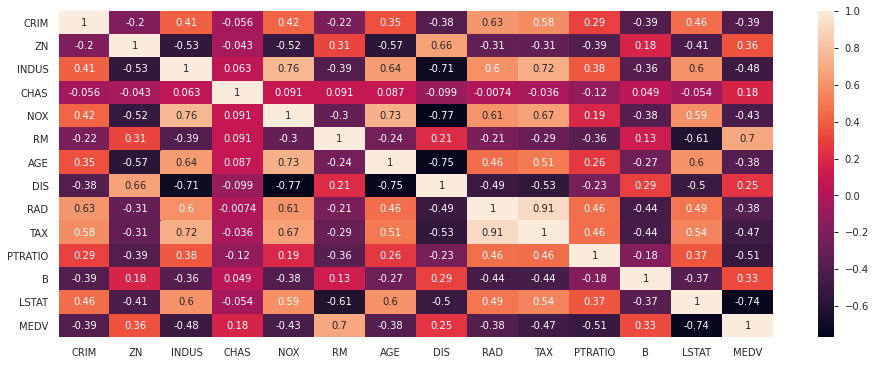

In [18]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

Visualizando a relação entre algumas features e variável alvo

In [0]:
# Importando o Plot.ly
import plotly.express as px

In [20]:
# RM vs MEDV (Número de quartos e valor médio do imóvel)
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()

In [21]:
# LSTAT vs MEDV (índice de status mais baixo da população e preço do imóvel)
fig = px.scatter(data, x=data.LSTAT, y=data.MEDV)
fig.show()

In [22]:
# PTRATIO vs MEDV (percentual de proporção de alunos para professores)
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()

#### Analisando Outliers

In [23]:
# estatística descritiva da variável RM
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [24]:
# visualizando a distribuição da variável RM
import plotly.figure_factory as ff
labels = ['Distribuição da variável RM (número de quartos)']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [25]:
# Visualizando outliers na variável RM
import plotly.express as px

fig = px.box(data, y='RM')
fig.update_layout( width=800,height=800)
fig.show()

Visualizando a distribuição da variável MEDV

In [26]:
# estatística descritiva da variável MEDV
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [27]:
# visualizando a distribuição da variável MEDV
import plotly.figure_factory as ff
labels = ['Distribuição da variável MEDV (preço médio do imóvel)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

Analisando a simetria do dado

In [0]:
# carrega o método stats da scipy
from scipy import stats

In [29]:
# imprime o coeficiente de pearson
stats.skew(data.MEDV)

1.104810822864635

Coeficiente de Pearson
*   Valor entre -1 e 1 - distribuição simétrica.
*   Valor maior que 1 - distribuição assimétrica positiva.
*   Valor maior que -1 - distribuição assimétrica negativa.

In [30]:
# Histogram da variável MEDV (variável alvo)
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [31]:
# Visualizando outliers na variável MEDV
import plotly.express as px

fig = px.box(data, y='MEDV')
fig.update_layout( width=800,height=800)
fig.show()

In [32]:
# estatistica descritiva das variáveis
data[['PTRATIO','LSTAT','RM']].describe()

,PTRATIO,LSTAT,RM
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,6.284634
std,2.164946,7.141062,0.702617
min,12.600000,1.730000,3.561000
25%,17.400000,6.950000,5.885500
50%,19.050000,11.360000,6.208500
75%,20.200000,16.955000,6.623500
max,22.000000,37.970000,8.780000


In [33]:
# imprimindo os 16 maiores valores de MEDV
data[['RM','LSTAT','PTRATIO','MEDV']].nlargest(16, 'MEDV')

,RM,LSTAT,PTRATIO,MEDV
161,7.489,1.73,14.7,50.0
162,7.802,1.92,14.7,50.0
163,8.375,3.32,14.7,50.0
166,7.929,3.70,14.7,50.0
186,7.831,4.45,17.8,50.0
195,7.875,2.97,14.4,50.0
204,8.034,2.88,14.7,50.0
225,8.725,4.63,17.4,50.0
257,8.704,5.12,13.0,50.0
267,8.297,7.44,13.0,50.0


In [0]:
# filtra os top 16 maiores registro da coluna MEDV
top16 = data.nlargest(16, 'MEDV').index

In [0]:
# remove os valores listados em top16
data.drop(top16, inplace=True)

In [36]:
# visualizando a distribuição da variável MEDV
import plotly.figure_factory as ff
labels = ['Distribuição da variável MEDV (número de quartos)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

In [37]:
# Histogram da variável MEDV (variável alvo)
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [38]:
# imprime o coeficiente de pearson
stats.skew(data.MEDV)

0.7732836030909053

**Definindo um Baseline**

- `Uma baseline é importante para ter marcos no projeto`.
- `Permite uma explicação fácil para todos os envolvidos`.
- `É algo que sempre tentaremos ganhar na medida do possível`.

In [0]:
# converte os dados
data.RM = data.RM.astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    int64  
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 57.4 KB


In [41]:
# estatística descritiva da coluna numero de quartos
data.RM.describe()

count    490.000000
mean       5.740816
std        0.737657
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: RM, dtype: float64

In [0]:
# definindo a regra para categorizar os dados
categorias = []

In [0]:
# alimenta a lista categorias
for i in data.RM.iteritems():
  valor = (i[1])
  if valor <= 4:
    categorias.append('Pequeno')
  elif valor < 7:
    categorias.append('Medio')
  else:
    categorias.append('Grande')

In [0]:
# cria a coluna categorias
data['categorias'] = categorias

In [46]:
# imprime a contagem de categorias
data.categorias.value_counts()

Medio      424
Grande      52
Pequeno     14
Name: categorias, dtype: int64

In [0]:
# agrupa as categorias e calcula as médias
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [48]:
# visualizando a variável medias_categorias
medias_categorias

categorias
Grande     35.719231
Medio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [0]:
# criando o dicionario com chaves medio, grande e pequeno e seus valores
dic_baseline = {'Grande': medias_categorias[0], 'Medio': medias_categorias[1], 'Pequeno': medias_categorias[2]}

In [50]:
# imprime dicionario
dic_baseline

{'Grande': 35.71923076923077,
 'Medio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [0]:
# cria a função retorna baseline
def retorna_baseline(num_quartos):
  if num_quartos <= 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos < 7:
    return dic_baseline.get('Medio')
  else:
    return dic_baseline.get('Grande')

In [52]:
# chama a função retorna baseline
retorna_baseline(3)

14.921428571428574

In [53]:
for i in data.RM.iteritems():
  n_quartos = i[1]
  print('Número de quartos é: {} , Valor médio: {}'.format(n_quartos,retorna_baseline(n_quartos)))

Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número d

In [54]:
# imprime as 5 primeiras linhas do dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Medio
1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Medio
2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Medio
4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande
